# My First Machine Learning Program

## Introduction
There is no better way to learn Machine Learning than to experiment with it! In this notebook you are step by step guided to do this. Challenge yourself in trying to understand the code and try to change the parameters.


First things first, we need a few libraries.

In [6]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.14.3
pandas version: 0.23.0
scikit-learn version: 0.19.1
matplotlib version: 2.2.2


The algorithm you are going to use is known as k-NN (k-Nearest Neighbors) classification.

#### DIY
In Canvas more information is provided about kNN. Read through it and write down how you think the learning works.

## The supervised learning classification steps: overview

This notebook implements all specific tasks in applying supervised machine learning techniques:

* Preparing the data, 
* Analysing and visualising the data, 
* Cleaning the data, 
* Selecting features, 
* Dividing your data into a training and test set, 
* Training your Machine learning algorithm, 
* Applying the machine learning algorithm 
* and Evaluating its results.

You will learn more on how to do each task in the weeks to come. For now, try to read the code and experiment with it.

## Step 1 Preparing the data
The first step is to get the data. There are a lot of prepared datasets available on the internet. We've selected 3 very popular small datasets for you that are suitable for a classification. 
* Iris dataset (150 entries of 4 input features and 1 output label) 
* Wine dataset (178 entries of 13 input features and 1 output label)
* Computer hardware dataset (209 entries of 9 input features and 1 output label)

#### DIY
Take a look at the website https://archive.ics.uci.edu/ml/datasets.html and find these datasets there. What information or metadata is available? List resources that explain the content of these dataset and that used these datasets to test learning algorithmns.

### Downloading

In [68]:
df_iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
df_wine = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data")
df_computer = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data")

#### DIY
Note that for the third dataset, the Computer hardware dataset, no code is given throughout the notebook. Learn how to change the parameters in the code to achieve a similar result.

In [4]:
df_macdf_computer.columns = ['vendor name', 'Model name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
print('Computer Hardware dataset shape: {}'.format(df_computer.shape))
df_computer.head(208)hine = pd.DataFrame({'A': [1, 2], 'B': [3, 4], 'Vendor name': ["waarde 1", "waarde 2"]})

### Exploring the iris dataset

In [121]:
df_iris.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
print('Iris dataset shape: {}'.format(df_iris.shape))
df_iris.head(149)

Iris dataset shape: (149, 5)


Sepal Length  Sepal Width  Petal Length  Petal Width         Species
0             4.9          3.0           1.4          0.2     Iris-setosa
1             4.7          3.2           1.3          0.2     Iris-setosa
2             4.6          3.1           1.5          0.2     Iris-setosa
3             5.0          3.6           1.4          0.2     Iris-setosa
4             5.4          3.9           1.7          0.4     Iris-setosa
5             4.6          3.4           1.4          0.3     Iris-setosa
6             5.0          3.4           1.5          0.2     Iris-setosa
7             4.4          2.9           1.4          0.2     Iris-setosa
8             4.9          3.1           1.5          0.1     Iris-setosa
9             5.4          3.7           1.5          0.2     Iris-setosa
10            4.8          3.4           1.6          0.2     Iris-setosa
11            4.8          3.0           1.4          0.1     Iris-setosa
12            4.3          3.0           1.1          0.1     Iris-setosa
13            5.8          4.0           1.2          0.2     Iris-setosa
14            5.7          4.4           1.5          0.4     Iris-setosa
15            5.4          3.9           1.3          0.4     Iris-setosa
16            5.1          3.5           1.4          0.3     Iris-setosa
17            5.7          3.8           1.7          0.3     Iris-setosa
18            5.1          3.8           1.5          0.3     Iris-setosa
19            5.4          3.4           1.7          0.2     Iris-setosa
20            5.1          3.7           1.5          0.4     Iris-setosa
21            4.6          3.6           1.0          0.2     Iris-setosa
22            5.1          3.3           1.7          0.5     Iris-setosa
23            4.8          3.4           1.9          0.2     Iris-setosa
24            5.0          3.0           1.6          0.2     Iris-setosa
25            5.0          3.4           1.6          0.4     Iris-setosa
26            5.2          3.5           1.5          0.2     Iris-setosa
27            5.2          3.4           1.4          0.2     Iris-setosa
28            4.7          3.2           1.6          0.2     Iris-setosa
29            4.8          3.1           1.6          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
119           6.9          3.2           5.7          2.3  Iris-virginica
120           5.6          2.8           4.9          2.0  Iris-virginica
121           7.7          2.8           6.7          2.0  Iris-virginica
122           6.3          2.7           4.9          1.8  Iris-virginica
123           6.7          3.3           5.7          2.1  Iris-virginica
124           7.2          3.2           6.0          1.8  Iris-virginica
125           6.2          2.8           4.8          1.8  Iris-virginica
126           6.1          3.0           4.9          1.8  Iris-virginica
127           6.4          2.8           5.6          2.1  Iris-virginica
128           7.2          3.0           5.8          1.6  Iris-virginica
129           7.4          2.8           6.1          1.9  Iris-virginica
130           7.9          3.8           6.4          2.0  Iris-virginica
131           6.4          2.8           5.6          2.2  Iris-virginica
132           6.3          2.8           5.1          1.5  Iris-virginica
133           6.1          2.6           5.6          1.4  Iris-virginica
134           7.7          3.0           6.1          2.3  Iris-virginica
135           6.3          3.4           5.6          2.4  Iris-virginica
136           6.4          3.1           5.5          1.8  Iris-virginica
137           6.0          3.0           4.8          1.8  Iris-virginica
138           6.9          3.1           5.4          2.1  Iris-virginica
139           6.7          3.1           5.6          2.4  Iris-virginica
140           6.9          3.1           5.1          2.3  Iris-virginica
141      

### Exploring Wine dataset

In [94]:
df_wine.columns = ['Class ID', 'Alcohol', 'Malic acid', 'Ash', 'Alcalnity of Ash', 'Magnesium', 'Total phonols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'Diluted wines', 'Proline']
print('Wine dataset shape: {}'.format(df_wine.shape))
df_wine.head(5)

Wine dataset shape: (177, 14)


Class ID  Alcohol  Malic acid   Ash  Alcalnity of Ash  Magnesium  \
0         1    13.20        1.78  2.14              11.2        100   
1         1    13.16        2.36  2.67              18.6        101   
2         1    14.37        1.95  2.50              16.8        113   
3         1    13.24        2.59  2.87              21.0        118   
4         1    14.20        1.76  2.45              15.2        112   

   Total phonols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  Diluted wines  Proline  
0             4.38  1.05           3.40     1050  
1             5.68  1.03           3.17     1185  
2             7.80  0.86           3.45     1480  
3             4.32  1.04           2.93      735  
4             6.75  1.05           2.85     1450

### DIY Exploring Computer hardware dataset

In [71]:
df_computer.columns = ['Vendor name', 'Model name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
print('Computer Hardware dataset shape: {}'.format(df_computer.shape))
df_computer.head(5)

Computer Hardware dataset shape: (208, 10)


Vendor name Model name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  ERP
0      amdahl     470v/7    29  8000  32000    32      8     32  269  253
1      amdahl    470v/7a    29  8000  32000    32      8     32  220  253
2      amdahl    470v/7b    29  8000  32000    32      8     32  172  253
3      amdahl    470v/7c    29  8000  16000    32      8     16  132  132
4      amdahl     470v/b    26  8000  32000    64      8     32  318  290

## Analysing and visualising the data & cleaning the data

In this process the features should be stored in a 2D NxM array (matrix) variable separate from the label which should be stored in a 1D array (or vector) of size N. N (# rows) represents the number of data points or entries, M (# columns) represents the number of features. If necessary, textual information should be removed or transformed into numerical data. 

#### DIY
Take a look at the topics we'll discuss next weeks. When will we take about visualisation? When will we discuss data cleaning?

#### Iris dataset

In [122]:
df_iris['Species-id'] = df_iris['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df_iris.head(7)

Sepal Length  Sepal Width  Petal Length  Petal Width      Species  \
0           4.9          3.0           1.4          0.2  Iris-setosa   
1           4.7          3.2           1.3          0.2  Iris-setosa   
2           4.6          3.1           1.5          0.2  Iris-setosa   
3           5.0          3.6           1.4          0.2  Iris-setosa   
4           5.4          3.9           1.7          0.4  Iris-setosa   
5           4.6          3.4           1.4          0.3  Iris-setosa   
6           5.0          3.4           1.5          0.2  Iris-setosa   

   Species-id  
0           0  
1           0  
2           0  
3           0  
4           0  
5           0  
6           0

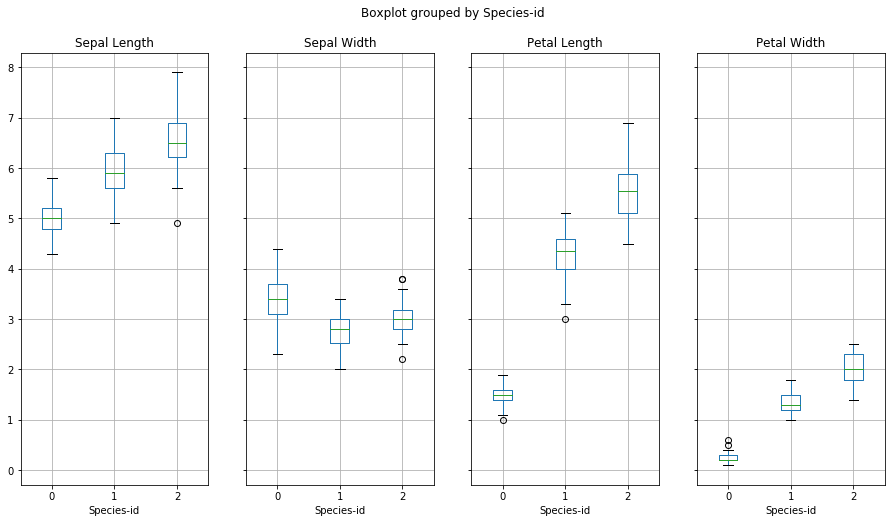

In [20]:
iris_features = tuple(df_iris.columns[:4].values)
df_iris.boxplot(column=iris_features, by='Species-id', figsize=(15,8), layout=(1,4));

#### Wine dataset

Wine doesn't need to be cleaned for now.

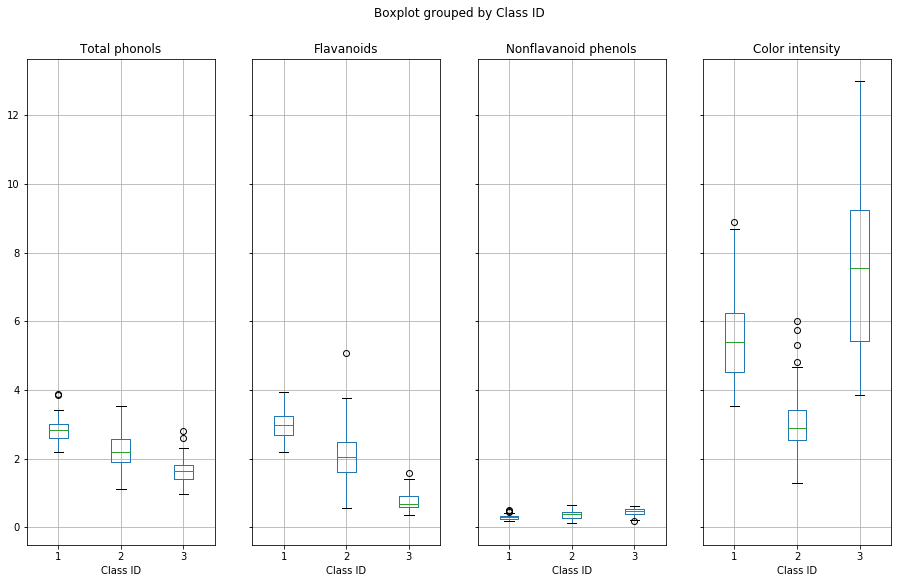

In [48]:
wine_features = ('Total phonols', 'Flavanoids', 'Nonflavanoid phenols', 'Color intensity')
df_wine.boxplot(column=wine_features, by='Class ID', figsize=(15,9), layout=(1,4));

#### DIY Computer hardware dataset

This step is a bit challenging because the column Vendor name contains text information. kNN, and all other learning algorithms that we will be studying, does not work on textual information.

To overcome this, one technique in data cleaning is to find all occurences of a particular string and replace it with a number. We will see later that there are other and better ways.

In [73]:
df_computer['Vendor id'] = df_computer['Vendor name'].map({
    'adviser': 0, 'amdahl': 1,'apollo': 2, 'basf': 3, 'bti': 4, 'burroughs': 5, 
    'c.r.d': 6, 'cambex': 7, 'cdc': 8, 'dec': 9, 'dg': 10, 'formation': 11, 
    'four-phase': 12, 'gould': 13, 'honeywell': 14, 'hp': 15, 'harris': 16, 'ibm': 17, 
    'ipl': 18, 'magnuson': 19, 'microdata': 20, 'nas': 21, 'ncr': 22, 
    'nixdorf': 23, 'perkin-elmer': 24, 'prime': 25, 'siemens': 26, 
    'sperry': 27, 'sratus': 28, 'wang': 29
})

Tips to inspect this dataset:
* What can be a good column to predict?
* Select 2 columns that you think can predict your first column
* If there are more then three possible prediction values, select those 3 that are most common

In [137]:
# inspection of possible class column
print('Computer Hardware dataset shape: {}'.format(df_computer.shape))
    df_computer.head(50)

Computer Hardware dataset shape: (208, 11)


Vendor name       Model name  MYCT   MMIN   MMAX  CACH  CHMIN  CHMAX   PRP  \
0       amdahl           470v/7    29   8000  32000    32      8     32   269   
1       amdahl          470v/7a    29   8000  32000    32      8     32   220   
2       amdahl          470v/7b    29   8000  32000    32      8     32   172   
3       amdahl          470v/7c    29   8000  16000    32      8     16   132   
4       amdahl           470v/b    26   8000  32000    64      8     32   318   
5       amdahl         580-5840    23  16000  32000    64     16     32   367   
6       amdahl         580-5850    23  16000  32000    64     16     32   489   
7       amdahl         580-5860    23  16000  64000    64     16     32   636   
8       amdahl         580-5880    23  32000  64000   128     32     64  1144   
9       apollo            dn320   400   1000   3000     0      1      2    38   
10      apollo            dn420   400    512   3500     4      1      6    40   
11        basf             7/65    60   2000   8000    65      1      8    92   
12        basf             7/68    50   4000  16000    65      1      8   138   
13         bti             5000   350     64     64     0      1      4    10   
14         bti             8000   200    512  16000     0      4     32    35   
15   burroughs            b1955   167    524   2000     8      4     15    19   
16   burroughs            b2900   143    512   5000     0      7     32    28   
17   burroughs            b2925   143   1000   2000     0      5     16    31   
18   burroughs            b4955   110   5000   5000   142      8     64   120   
19   burroughs            b5900   143   1500   6300     0      5     32    30   
20   burroughs            b5920   143   3100   6200     0      5     20    33   
21   burroughs            b6900   143   2300   6200     0      6     64    61   
22   burroughs            b6925   110   3100   6200     0      6     64    76   
23       c.r.d         68/10-80   320    128   6000     0      1     12    23   
24       c.r.d   universe:2203t   320    512   2000     4      1      3    69   
25       c.r.d      universe:68   320    256   6000     0      1      6    33   
26       c.r.d   universe:68/05   320    256   3000     4      1      3    27   
27       c.r.d  universe:68/137   320    512   5000     4      1      5    77   
28       c.r.d   universe:68/37   320    256   5000     4      1      6    27   
29         cdc    cyber:170/750    25   1310   2620   131     12     24   274   
30         cdc    cyber:170/760    25   1310   2620   131     12     24   368   
31         cdc    cyber:170/815    50   2620  10480    30     12     24    32   
32         cdc    cyber:170/825    50   2620  10480    30     12     24    63   
33         cdc    cyber:170/835    56   5240  20970    30     12     24   106   
34         cdc    cyber:170/845    64   5240  20970    30     12     24   208   
35         cdc      omega:480-i    50    500   2000     8      1      4    20   
36         cdc     omega:480-ii    50   1000   4000     8      1      5    29   
37         cdc    omega:480-iii    50   2000   8000     8      1      5    71   
38      cambex           1636-1    50   1000   4000     8      3      5    26   
39      cambex          1636-10    50   1000   8000     8      3      5    36   
40      cambex           1641-1    50   2000  16000     8      3      5    40   
41      cambex          1641-11    50   2000  16000     8      3      6    52   
42      cambex           1651-1    50   2000  16000     8      3      6    60   
43         dec   decsys:10:1091   133   1000  12000     9      3     12    72   
44         dec   decsys:20:2060   133   1000   8000     9      3     12    72   
45         dec       microvax-1   810    512    512     8      1      1    18   
46         dec       vax:11/730   810   1000   5000     0      1      1    20   
47         dec       vax:11/750   320    512   8000     4      1      5    40   
48         dec       vax:11/780   

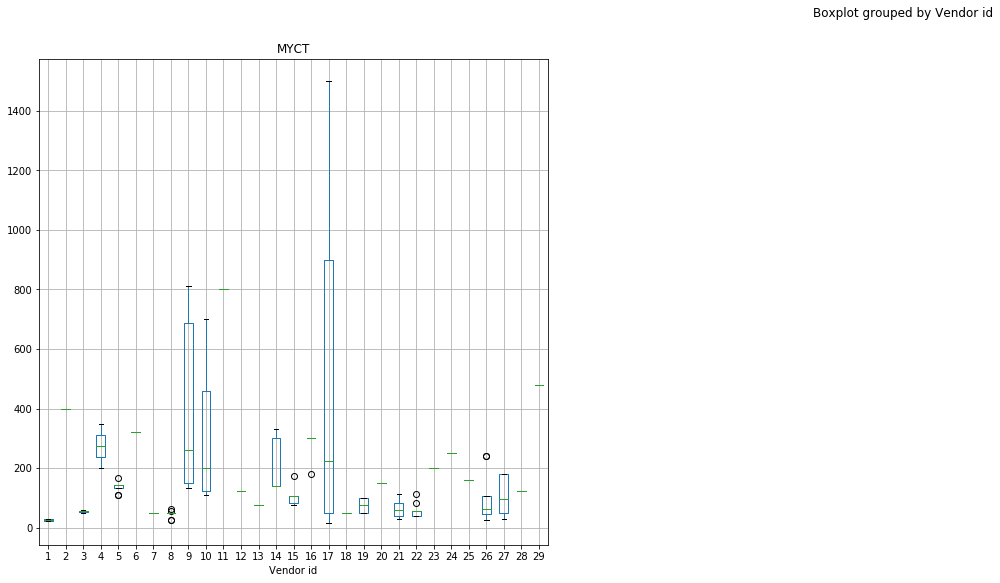

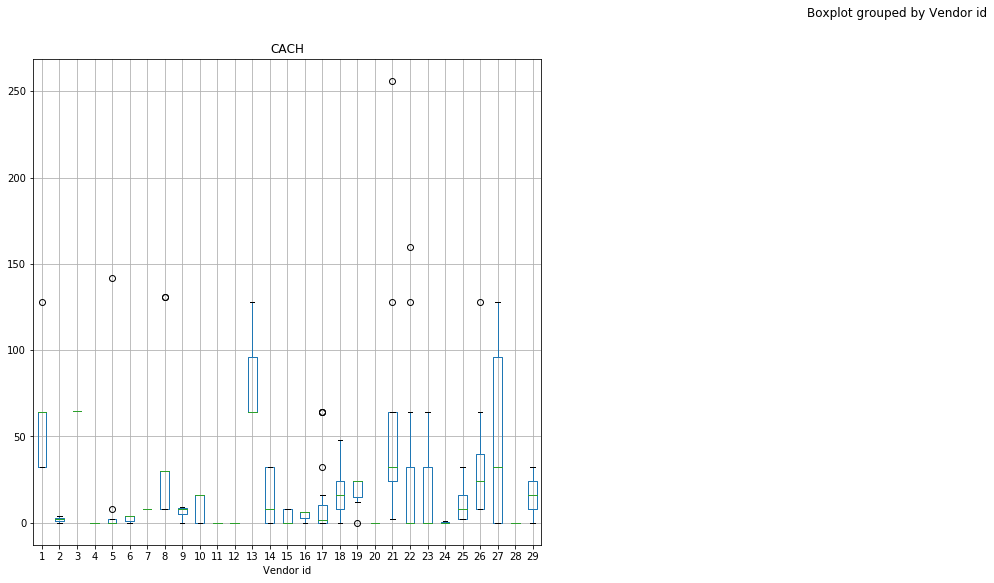

In [103]:
# inspection of possible feature columns
computer_features =tuple(df_computer.columns[:10].values)
df_computer.boxplot(column=computer_features[2], by='Vendor id', figsize=(30,9), layout=(1,3));
df_computer.boxplot(column=computer_features[5], by='Vendor id', figsize=(30,9), layout=(1,4));

## Selecting features (and scaling them)
We will scale each feature (linearly) between 0 and 10.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

#### Iris dataset - step 3

Iris types: [0 1 2]
The length of X_iris: 149


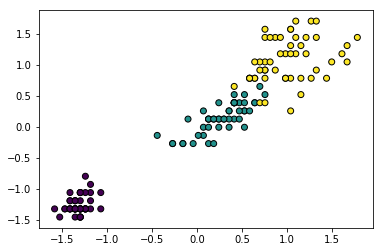

In [123]:
# Define X_iris and y_iris
X_iris = df_iris[['Petal Length', 'Petal Width']]
y_iris = df_iris['Species-id']
print('Iris types:', df_iris['Species-id'].unique())

# Normalize
scaler_iris = StandardScaler().fit(X_iris)
X_iris = scaler_iris.transform(X_iris)
print('The length of X_iris: {}'.format(len(X_iris)))

plt.scatter(X_iris[:,0], X_iris[:,1], edgecolors='k', c=y_iris)

#### Wine dataset - step 3

wine types: [1 2 3]
The length of X_wine: 177


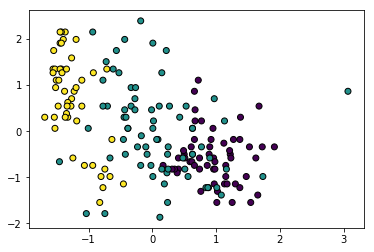

In [95]:
# Define X_wine and y_wine
X_wine = df_wine[['Flavanoids', 'Nonflavanoid phenols']]
y_wine = df_wine['Class ID']
print('wine types:', df_wine['Class ID'].unique())

# Normalize
scaler_wine = StandardScaler().fit(X_wine)
X_wine = scaler_wine.transform(X_wine)
print('The length of X_wine: {}'.format(len(X_wine)))

plt.scatter(X_wine[:,0], X_wine[:,1], edgecolors='k', c=y_wine)

#### Computer hardware dataset - step 3

classification possibilities: [ 1  2  3  4  5  6  8  7  9 10 11 12 13 15 16 14 17 18 19 20 21 22 23 24
 25 26 27 28 29]
The length of X_computer: 208


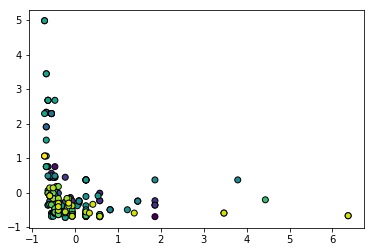

In [165]:
# Define X_machine and y_machine
X_computer = df_computer[['CHMAX', 'MYCT']]
y_computer = df_computer['Vendor id']

print('classification possibilities:', y_computer.unique())

# Normalize
scaler_computer = StandardScaler().fit(X_computer)
X_computer = scaler_computer.transform(X_computer)
print('The length of X_computer: {}'.format(len(X_computer)))

# Scatter plot

plt.scatter(X_computer[:,0], X_computer[:,1], edgecolors='k', c=y_computer)


## Dividing your data into a training and test set

Let’s use the symbol X for the scaled 2D input feature array, and the symbol y for the 1D output label vector.
We will split the data into a train set and test set.

#### Iris dataset

Train shape: (111, 2) (111,)
Test shape: (38, 2) (38,)


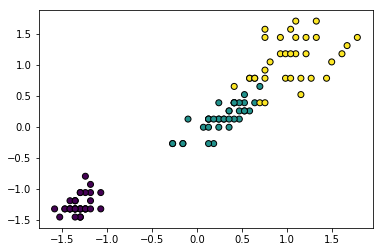

In [105]:
# Split in train and test sets
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.25)
print('Train shape:', X_train_iris.shape, y_train_iris.shape)
print('Test shape:', X_test_iris.shape, y_test_iris.shape)

plt.scatter(X_train_iris[:,0], X_train_iris[:,1], edgecolors='k', c=y_train_iris)

#### Wine dataset

Train shape: (132, 2) (132,)


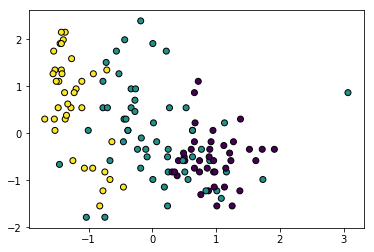

In [107]:
# Split in train and test sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.25)
print('Train shape:', X_train_wine.shape, y_train_wine.shape)

plt.scatter(X_train_wine[:,0], X_train_wine[:,1], edgecolors='k', c=y_train_wine)

#### DIY Computer hardware dataset

Train shape: (156, 2) (156,)


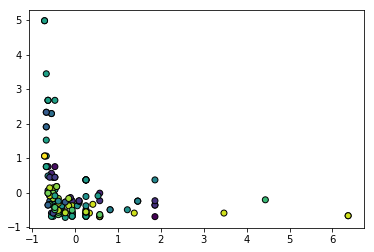

In [166]:
# Split in train and test sets
X_train_computer, X_test_computer, y_train_computer, y_test_computer = train_test_split(X_computer, y_computer, test_size=0.25)
print('Train shape:', X_train_computer.shape, y_train_computer.shape)

plt.scatter(X_train_computer[:,0], X_train_computer[:,1], edgecolors='k', c=y_train_computer)

## Training your Machine learning algorithm

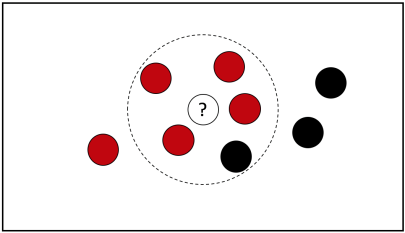
<i>Figure 1: A data point is classified by majority votes from its 5 nearest neighbors. Here, the unknown point would be classified as red, since 4 out of 5 neighbors are red.</i>

The library sklearn contains an implementation of the NearestNeighbors algorithm:

In [109]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from matplotlib.colors import ListedColormap

We create a function that takes the features and labels of the data as parameters, as the number of neighbors. We next predict the class for all possible values in the two dimensions. These results are plotted, visualising the decision boundaries between predicted classes.

In [110]:
def plot_nearest_neighbors(X_train, X_test, Y_train, Y_test, k, classlabels, featurelabels, weight):
    print('Number of training points: ',X_train.size)
    possible_classes = Y_train.unique()
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(X_train)
    distances, indices = nbrs.kneighbors(X_test)
    
    nb_of_classes = classlabels.unique().size
    
    h = .02  # step size in the mesh

    ## Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    ## we create an instance of Neighbours Classifier and fit the data.
    clf_data = KNeighborsClassifier(k, weights=weight)
    clf_data.fit(X_train, Y_train)

    ## Plot the decision boundary. For that, we will assign a color to each
    ## possible point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    Z_data = clf_data.predict(np.c_[xx.ravel(), yy.ravel()])

    ## Put the result into a color plot
    Z_data = Z_data.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z_data, cmap=cmap_light)

    ## Plot also the training points
    #print(Y_train)
    #print(X_train[0])

    for i in possible_classes:
        x1s_data = X_train[:, 0][Y_train.values == i]
        x2s_data = X_train[:, 1][Y_train.values == i]
        plt.scatter(x1s_data, x2s_data, cmap=cmap_bold, edgecolors='k', label=i)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("%i-Class classification (k = %i, weights = '%s')" % (nb_of_classes, k, weight))
    plt.xlabel(featurelabels[0])
    plt.ylabel(featurelabels[1])
    plt.legend()
    plt.show()
        
    return clf_data         

#### Plotting the decision boundary for the Iris dataset

Number of training points:  222


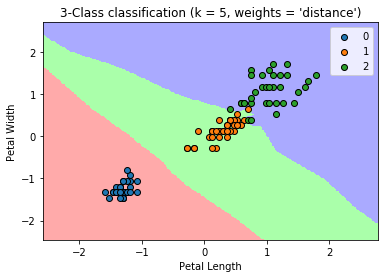

In [124]:
clf_iris = plot_nearest_neighbors(X_train_iris, X_test_iris, y_train_iris, y_test_iris, 5, df_iris.Species, ['Petal Length', 'Petal Width'], 'distance')


#### Plotting the decision boundary for the Wine dataset

Number of training points:  264


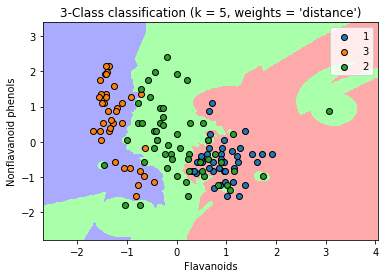

In [112]:
clf_wine = plot_nearest_neighbors(X_train_wine, X_test_wine, y_train_wine, y_test_wine, 5, df_wine['Class ID'], ['Flavanoids', 'Nonflavanoid phenols'], 'distance')

#### DIY Plotting the decision boundary for the Computer hardware dataset

Number of training points:  312


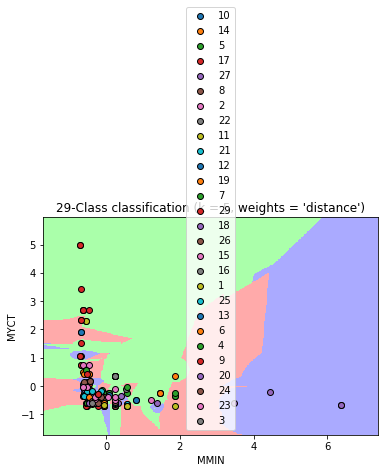

In [167]:
clf_computer = plot_nearest_neighbors(X_train_computer, X_test_computer, y_train_computer, y_test_computer, 5, df_computer['Vendor id'], ['MMIN', 'MYCT'], 'distance')

### Step 6 - Result of learning: accuracy
The accuracy of your KNN algorithm is based on the correct predicted labels of the hold-out test set.

#### Iris dataset

In [125]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_iris.size)
y_pred_iris = clf_iris.predict(X_test_iris)

Number of test points:  76


Accuracy score for the Iris Dataset:

In [126]:
metrics.accuracy_score(y_test_iris, y_pred_iris)

0.9736842105263158

#### DIY Wine dataset

Copy the evaluation code above, and change it to calculate it for the wine dataset.

Advanced: make a function of the accurancy code and apply to the machine dataset.

In [127]:
print('Number of test points: ',X_test_wine.size)
y_pred_wine = clf_wine.predict(X_test_wine)
metrics.accuracy_score(y_test_wine, y_pred_wine)

Number of test points:  90


0.8222222222222222

In [170]:
print('Number of test points: ',X_test_computer.size)
y_pred_computer = clf_computer.predict(X_test_computer)
metrics.accuracy_score(y_test_computer, y_pred_computer)

Number of test points:  104


0.6538461538461539